## 7_Sprint_7T01
### Tasca dades, probabilitats i estadístiques
#### Eloi Canals

In [1]:
# imports
import pandas as pd
import numpy as np

import scipy
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# proves amb MLB
mlb = pd.read_csv('mlb.txt', sep = "	")
mlb.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


In [3]:
mlb.describe()

,salary
count,828.000000
mean,3281.828339
std,4465.448980
min,400.000000
25%,418.315000
50%,1093.750000
75%,4250.000000
max,33000.000000


   #### Exercici 1. Moda, la mediana, la desviació estàndard i la mitjana aritmètica

In [4]:
# Moda.
mlb_mode = scipy.stats.mode(mlb.salary, axis=0, nan_policy='propagate')
mlb_mode

ModeResult(mode=array([400.]), count=array([41]))

In [5]:
# Mediana
mlb.median()

salary    1093.75
dtype: float64

In [6]:
# Standard Deviation
mlb.std()

salary    4465.44898
dtype: float64

In [7]:
# Mitjana aritmetica
mlb.mean()

salary    3281.828339
dtype: float64

#### Exercici 2. Selecciona dos atributs i calcula'n la seva correlació. 

#### Nivell 2. Exercici 3. Calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat

In [8]:
## Afegim els atributs corresponents a Position en forma numèrica
positions_u = mlb.position.unique()
positions_u

array(['Pitcher', 'Catcher', 'First Baseman', 'Outfielder', 'Shortstop',
       'Second Baseman', 'Third Baseman', 'Designated Hitter',
       'Infielder'], dtype=object)

In [9]:
desglose_df = mlb.position.str.get_dummies(sep='|')
desglose_df

,Catcher,Designated Hitter,First Baseman,Infielder,Outfielder,Pitcher,Second Baseman,Shortstop,Third Baseman
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
823,0,0,0,0,0,1,0,0,0
824,0,0,0,0,0,0,0,1,0
825,0,0,0,0,0,1,0,0,0
826,0,0,0,0,0,1,0,0,0


In [10]:
mlb = mlb.join(desglose_df)


In [11]:
mlb.head()

,player,team,position,salary,Catcher,Designated Hitter,First Baseman,Infielder,Outfielder,Pitcher,Second Baseman,Shortstop,Third Baseman
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0,0,0,0,0,0,1,0,0,0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0,0,0,0,0,0,1,0,0,0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0,1,0,0,0,0,0,0,0,0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0,0,0,0,0,0,1,0,0,0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0,0,0,1,0,0,0,0,0,0


In [12]:
# Correlació entre sou i position Pitcher
mlb[['salary','Pitcher']].corr()

,salary,Pitcher
salary,1.000000,-0.062722
Pitcher,-0.062722,1.000000


#### Nivell 3. Exercici 3. calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

In [13]:
# Matriu de correlacions
corr_data = mlb.iloc[:,3:]
corr_matrix = corr_data.corr()
corr_matrix.head()

,salary,Catcher,Designated Hitter,First Baseman,Infielder,Outfielder,Pitcher,Second Baseman,Shortstop,Third Baseman
salary,1.000000,-0.089400,0.040427,0.131809,-0.039206,0.049352,-0.062722,-0.014403,-0.026414,0.073882
Catcher,-0.089400,1.000000,-0.027398,-0.068590,-0.020673,-0.138427,-0.293866,-0.073607,-0.079915,-0.071965
Designated Hitter,0.040427,-0.027398,1.000000,-0.021345,-0.006433,-0.043078,-0.091449,-0.022906,-0.024869,-0.022395
First Baseman,0.131809,-0.068590,-0.021345,1.000000,-0.016106,-0.107842,-0.228938,-0.057344,-0.062259,-0.056065
Infielder,-0.039206,-0.020673,-0.006433,-0.016106,1.000000,-0.032504,-0.069003,-0.017284,-0.018765,-0.016898


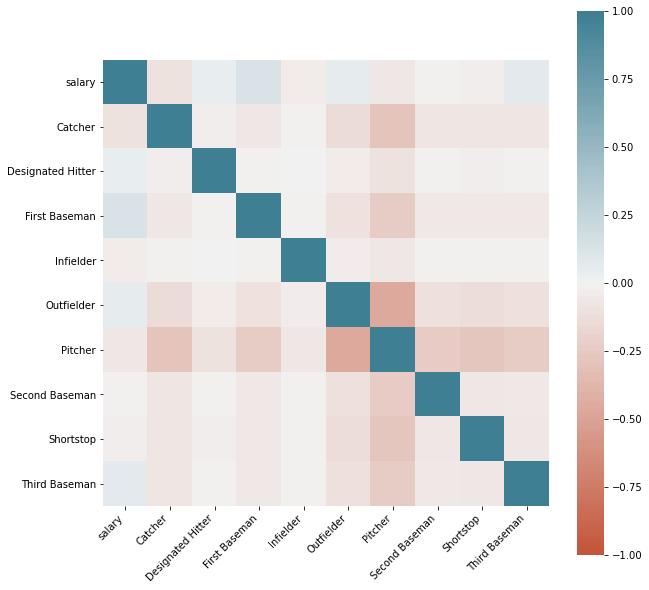

In [14]:
# Gràfic de intensitat de la matriu de correlacions
fig, ax = plt.subplots(figsize=(10,10))  

ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Nivell 3. Exercici 4. Selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

In [15]:
from scipy.stats.mstats import gmean
from scipy.stats.mstats import hmean

In [16]:
# Mitjana geomètrica
gmean(mlb['salary'])

1480.3381178021461

In [17]:
# Mitjana harmònica
hmean(mlb['salary'])

830.9388051739915